1. Loading the wine dataset ...
2.1. Balancing the data classes ...
2.2. Shuffling the data then splitting them in 70% training and 30% test ...
3.1. Choosing the DecisionTreeClassifier()'s algorithm to predict wine classes ...
3.2. Training the DecisionTreeClassifier()'s algorithm ...
4.1. The DecisionTreeClassifier()'s algorithm is making prediction ...
4.2.1. The DecisionTreeClassifier()'s algorithm accuracy score is 0.953125
4.2.2. The DecisionTreeClassifier()'s algorithm f1 score is [0.91428571 0.93617021 1.        ]
5. Illustrating the DecisionTreeClassifier()'s algorithm predictions ...


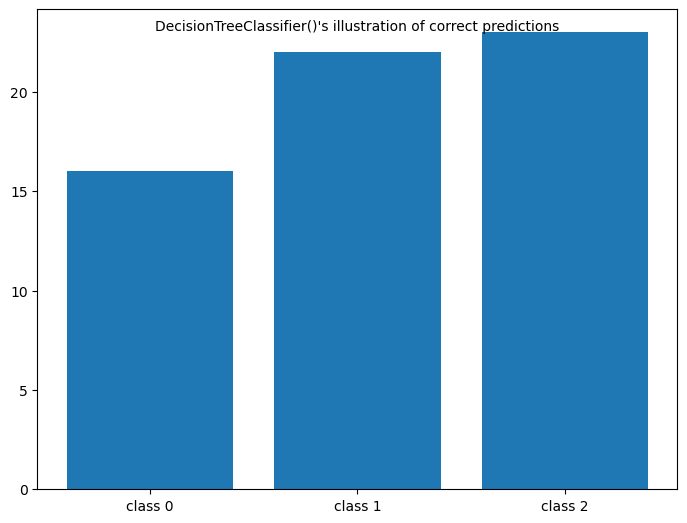

In [9]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from datetime import datetime
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from os import environ
from pathlib import Path
from sklearn.utils import Bunch
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 1. Laden der Daten
# Laden Sie die Daten in den Arbeitsspeicher, um die Daten anschließend zu verarbeiten. 
print("1. Loading the wine dataset ...")
wine_bunch = load_wine()


X = wine_bunch['data']
y = wine_bunch['target']

#2. Teilen der Daten in Training und Test
# Bitte achten Sie auf eine zufällige Aufteilung der Daten und eine Ausgeglichenheit der Klassen, dabei sollen 70% der Daten zum Training verwendet werden.
smote = SMOTE()
print("2.1. Balancing the data classes ...")
X_smote, y_smote = smote.fit_resample(X, y)

print("2.2. Shuffling the data then splitting them in 70% training and 30% test ...")
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, shuffle=True, train_size=0.7, random_state=42)


#3. Trainieren eines geeigneten Algorithmus
# Wählen Sie einen geeigneten Algorithmus aus, um die Sorten des Weins vorherzusagen. Trainieren Sie den Algorithmus. 
model = DecisionTreeClassifier()
print(f"3.1. Choosing the {model}'s algorithm to predict wine classes ...")

print(f"3.2. Training the {model}'s algorithm ...")
model.fit(X_smote_train, y_smote_train)

# 4. Testen des Algorithmus auf den Testdaten
# Berechnen Sie mindestens ein Maß für die Genauigkeit der Vorhersage.
expected = y_smote_test
print(f"4.1. The {model}'s algorithm is making prediction ...")
predicted = model.predict(X_smote_test)

accuracy_score = metrics.accuracy_score(expected, predicted)
print(f"4.2.1. The {model}'s algorithm accuracy score is {accuracy_score}")

f1_score = metrics.f1_score(expected, predicted, average=None)
print(f"4.2.2. The {model}'s algorithm f1 score is {f1_score}")

# 5. Illustration
# Stellen Sie graphisch dar, wie viele Weine der jeweiligen Klasse richtig vorhergesagt wurden.
print(f"5. Illustrating the {model}'s algorithm predictions ...")
correct_predictions = [0, 0, 0]
for i in range(len(predicted)):
    if predicted[i] == expected[i]:
        correct_predictions[predicted[i]] += 1
fig = plt.figure()
fig.suptitle(str(model)+"'s illustration of correct predictions", fontsize=10)
axes = fig.add_axes([0,0,1,1])
classes = ['class 0', 'class 1', 'class 2']
axes.bar(classes,correct_predictions)
plt.savefig(Path('result') / str(model)[0:-2])
plt.show()
